<a href="https://colab.research.google.com/github/nikeshthapa255/AI-MLOPS/blob/main/NLP_TextPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Programme in AI and MLOps
## A Program by IISc and TalentSprint
### Assignment 2: Text Preprocessing using NLTK

## Learning Objectives

At the end of the experiment, you will be able to:

* understand the use of NLTK library
* perform text pre-processing using NLTK such as removing html strips and noise text, removing special characters, lemmatization, stemming, tokenization, removing stop words

## Introduction

**NLTK** (Natural Language Toolkit) is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries.

It is a free, open source, community-driven project.

## Dataset Description

The IMDB movie review dataset can be downloaded from [here](http://ai.stanford.edu/~amaas/data/sentiment/). This dataset for binary sentiment classification contains around 50k movie reviews with the following attributes:

* **review:** text based review of each movie
* **sentiment:** positive or negative sentiment value


### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2303834" #@param {type:"string"}

In [2]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "8755068189" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "M5_AST_02_TextPreprocessing_using_NLTK_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")

    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/IMDB_Dataset.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aimlops-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing required packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk                                                                        # platform for building Python programs to process natural language
nltk.download('stopwords')                                                         # to download the stop words
nltk.download('punkt')                                                             # tokenizer divides a text into a list of sentences, by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences
nltk.download('wordnet')                                                           # to lemmatize word using WordNet's built-in function
nltk.download('averaged_perceptron_tagger')                                        # for part-of-speech tagger
from nltk.corpus import stopwords                                                  # importing the NTLK stopwords to remove articles, preposition and other words that are not actionable
from nltk.stem.porter import PorterStemmer                                         # process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
from nltk.tokenize import word_tokenize                                            # allows to create individual objects from a bag of words
from bs4 import BeautifulSoup                                                      # Python library for pulling data from HTML and XML files
import re                                                                          # regular expression (or RE) specifies a set of strings that matches it
import string
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


### Load the dataset

In [5]:
# read the dataset
df = pd.read_csv('IMDB_Dataset.csv')
print(df.shape)
df.head(10)      # first 10 rows

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [6]:
# Let us view one of the reviews
df["review"][5]

'Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it\'s not preachy or boring. It just never gets old, despite my having seen it some 15 or more times in the last 25 years. Paul Lukas\' performance brings tears to my eyes, and Bette Davis, in one of her very few truly sympathetic roles, is a delight. The kids are, as grandma says, more like "dressed-up midgets" than children, but that only makes them more fun to watch. And the mother\'s slow awakening to what\'s happening in the world and under her own roof is believable and startling. If I had a dozen thumbs, they\'d all be "up" for this movie.'

### Exploratory Data Analysis

In [7]:
# summary of the dataset
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


Now, we will look at the sentiment count by category.

In [8]:
# sentiment count
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [9]:
df['sentiment'].value_counts().values

array([25000, 25000])

<Axes: xlabel='sentiment'>

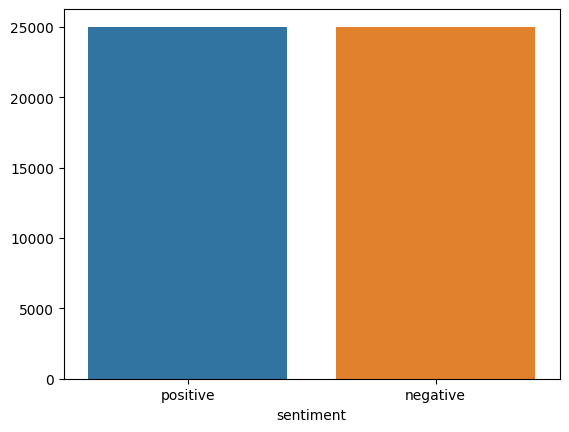

In [10]:
# Visualize the postive and negative sentiments
sns.barplot(x = df['sentiment'].value_counts().index,
            y = df['sentiment'].value_counts().values,
            hue = df['sentiment'].value_counts().index)

We can see that the dataset is balanced.

Now, we will do the text cleaning of the reviews.



## Text Preprocessing

The data scraped from the website is mostly in the raw text form. This data needs to be cleaned before analyzing it or fitting a model to it. Cleaning up the text data is necessary to highlight the attributes that we are going to want our machine learning system to pick up on.

**Removing noisy text**

Sample noise removal tasks could include:

* removing text file headers, footers
* removing HTML, XML, etc. markup and metadata
* extracting valuable data from other formats, such as JSON

In [11]:
# removing the html strips
def strip_html(text):
    # BeautifulSoup is a useful library for extracting data from HTML and XML documents
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# removing the square brackets
def remove_between_square_brackets(text):
    text = text.replace('[', '')
    text = text.replace(']', '')
    return text
    #return re.sub('\[[^]]*\]', '', text)          # to remove the text also present within square brackets

# removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

In [12]:
txt = """<body>
<h1>This is a test heading.</h1>
<p>Starting a paragraph here...</p>
</body>"""

print(strip_html(txt))


This is a test heading.
Starting a paragraph here...



In [13]:
txt = "I bought [apple, banana, orange] yesterday."

print(remove_between_square_brackets(txt))

I bought apple, banana, orange yesterday.


In [14]:
# apply function on review column
df['review'] = df['review'].apply(denoise_text)

**Removing special characters**

Special characters typically include any character that is not a letter or number, such as punctuation. Removing special characters from a string results in a string containing only letters and numbers.

We can use the `re` python library for Regular expression operations.

To know more about Regular expressions, click [here](https://realpython.com/regex-python/).

In [15]:
# define function for removing special characters
def remove_special_characters(text):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern, '', text)
    return text

In [16]:
txt = "Hi There! How are you?"

print(remove_special_characters(txt))

Hi There How are you


In [17]:
# apply function on review column
df['review'] = df['review'].apply(remove_special_characters)

**Lemmatization**

Lemmatization is a text pre-processing technique used to break a word down to its root meaning or word (called lemma) to identify similarities.

For example, a lemmatization algorithm would reduce the word ***better*** to its root word, or lemme, ***good***.

In [18]:
# Lemmatize word using WordNet's built-in function
# pos: The Part Of Speech tag.
#      Valid options are "n" for nouns, "v" for verbs, "a" for adjectives,
#                        "r" for adverbs and "s" for satellite adjectives.

lemmatizer = nltk.stem.WordNetLemmatizer()
print("better :", lemmatizer.lemmatize("better", pos ="a", ))

better : good


**Text Stemming**

Stemming, also called suffix stripping, is a technique used to reduce text dimensionality. Stemming is also a type of text normalization that enables you to standardize some words into specific expressions also called stems.

In [19]:
# stemming the text
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

In [20]:
txt = "He likes lemons bananas and oranges. He goes to market."

print(simple_stemmer(txt))

he like lemon banana and oranges. he goe to market.


In [21]:
# apply function on review column
df['review'] = df['review'].apply(simple_stemmer)

**Tokenization**

Tokenization is the process of splitting paragraphs and sentences into smaller understandable parts (words).

For example:

In [22]:
tokens = word_tokenize('I enjoy playing football in the rain.')
tokens

['I', 'enjoy', 'playing', 'football', 'in', 'the', 'rain', '.']

**Part-of-speech tagging**

Part-of-speech (POS) tagging is the task of determining the word class of a token. This is crucial for *disambiguation*, because different parts of speech may have similar forms.

In [23]:
tagged = nltk.pos_tag(tokens)
tagged

[('I', 'PRP'),
 ('enjoy', 'VBP'),
 ('playing', 'VBG'),
 ('football', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('rain', 'NN'),
 ('.', '.')]

**Removing stop words**

Stop words are English words that do not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. For example, the words like the, he, have etc.

In [24]:
# setting english stopwords
stopword_list = nltk.corpus.stopwords.words('english')
print(stopword_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

The above list of stopwords also contains the word "not", and its other forms such as don't, didn't, etc. We need them for correct sentiment classification.

For example, consider a negative review "*not a good movie*", and if we remove 'not' from it then it becomes a positive review "*a good movie*".

In [25]:
# Exclude 'not' and its other forms from the stopwords list

updated_stopword_list = []

for word in stopword_list:
    if word=='not' or word.endswith("n't"):
        pass
    else:
        updated_stopword_list.append(word)

print(updated_stopword_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', '

In [26]:
# removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    # splitting strings into tokens (list of words)
    tokens = word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        # filtering out the stop words
        filtered_tokens = [token for token in tokens if token not in updated_stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in updated_stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

In [27]:
txt = "The movie was not that great"

print(remove_stopwords(txt))

movie not great


In [ ]:
# apply function on review column
df['review'] = df['review'].apply(remove_stopwords)

In [29]:
df

,review,sentiment
0,one of the other review ha mention that after ...,positive
1,a wonder littl product the film techniqu is ve...,positive
2,i thought thi wa a wonder way to spend time on...,positive
3,basic there a famili where a littl boy jake th...,negative
4,petter mattei love in the time of money is a v...,positive
...,...,...
49995,i thought thi movi did a down right good job i...,positive
49996,bad plot bad dialogu bad act idiot direct the ...,negative
49997,i am a cathol taught in parochi elementari sch...,negative
49998,im go to have to disagre with the previou comm...,negative


### Training


#### XGBoost

In [37]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

# Prepare the data
X = df['review']
y = df['sentiment'].map({'positive': 1, 'negative': 0})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Accuracy: 0.8644

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      4961
           1       0.86      0.88      0.87      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



#### LSTM

In [38]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Prepare the data (same as before)
# ...

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to a fixed length
max_length = max([len(seq) for seq in X_train_seq])
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)

# Build the LSTM model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 128, input_length=max_length))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad, y_train, epochs=5, batch_size=32)

# Evaluate the model
_, accuracy = model.evaluate(X_test_pad, y_test)
print("Accuracy:", accuracy)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 119s 90ms/step - accuracy: 0.7233 - loss: 0.5336
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 110s 88ms/step - accuracy: 0.8817 - loss: 0.2871
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 88ms/step - accuracy: 0.9287 - loss: 0.1893
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 88ms/step - accuracy: 0.9705 - loss: 0.0905
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 88ms/step - accuracy: 0.9865 - loss: 0.0417
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.8878 - loss: 0.3874
Accuracy: 0.8903999924659729


### Please answer the questions below to complete the experiment:




In [30]:
#@title What is the primary goal of tokenization in natural language processing? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "To split text into individual units such as words or phrases" #@param ["", "To classify text into categories", "To split text into individual units such as words or phrases", "To generate synthetic text data", "To translate text into different languages"]

In [31]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [32]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "NA" #@param {type:"string"}


In [33]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [34]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [35]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [36]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 6092
Date of submission:  18 Aug 2024
Time of submission:  22:47:38
View your submissions: https://aimlops-iisc.talentsprint.com/notebook_submissions
